## Introduction 

The data is provided by Home Credit,(https://www.kaggle.com/c/home-credit-default-risk) a service dedicated to provided lines of credit (loans) to the unbanked population.In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're in need of a data scientist to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


In this notebook, we only used the 'application_train' data set.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer 

# from sklearn.preprocessing import Imputer

In [2]:
app_train = pd.read_csv('home-credit-data/application_train.csv')

In [3]:
print('Total data size is {}'.format(app_train.shape))

Total data size is (307511, 122)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Lets check for the missing values in each columns

In [5]:
count = app_train.isnull().sum().sort_values(ascending=False)
percentage = (app_train.isnull().sum()*100/len(app_train)).sort_values(ascending=False)

table_miss_val = pd.concat([count,percentage], axis=1, keys=['Count', 'Percentage (%)'])

In [6]:
table_miss_val.head(60)

,Count,Percentage (%)
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


The number of columns with null values are:

In [7]:
app_train.isnull().any().sum()

67

Check for any duplication

In [8]:
print('The number of the duplicated rows are {}'.format((app_train[app_train.duplicated()]).shape[0]))

The number of the duplicated rows are 0


Lets have a look at the out put data (TARGET). 

In [9]:
y = app_train['TARGET']

In [10]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [11]:
print('Client who default: {}%' .format(round((y.value_counts()[0]/(len(y)))*100)))
print('Clients who repay the loan: {}%'.format(round((y.value_counts()[1]/(len(y)))*100)))

Client who default: 92.0%
Clients who repay the loan: 8.0%


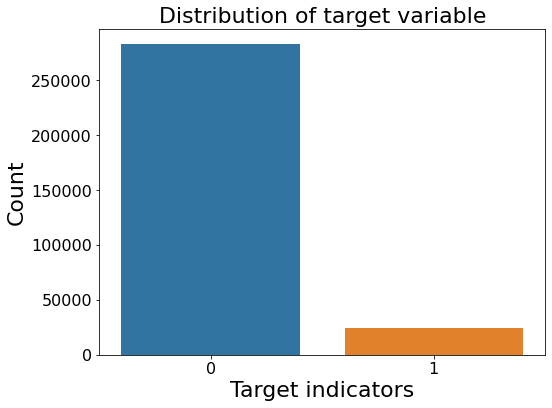

In [12]:
plotdata = y.value_counts()
plt.figure(figsize = (8,6))
ax=sns.barplot(x = plotdata.index, y=plotdata.values)

plt.title('Distribution of target variable', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.xlabel('Target indicators', fontsize=22)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
plt.show()

for i, j in enumerate(plotdata):
    ax.text(.2,i,j,weight = "bold",fontsize=20)

From above observation, it is obvious that the output data is imbalanced. About 92% can repay their loan and about 8% have difficulty in payment

Lets look at the types of the data

In [13]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
num_cols = []
for i in app_train.columns:
    if ((app_train[i].dtypes == 'int64')| (app_train[i].dtypes == 'float64')):
        num_cols.append(i)
print(len(num_cols))

106


All together we have 106 features as numeric and 16 features as an object

### Correlations

In [15]:
correlation=app_train.corr()['TARGET'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', correlation.tail(15))
print('\nMost Negative Correlations:\n', correlation.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target. 

Lets have a look to all numeric columns and check the unique number for each column

In [16]:
num_cols = []
for i in app_train.columns:
    if ((app_train[i].dtypes == 'int64')| (app_train[i].dtypes == 'float64')):
        num_cols.append(i)
print('List of the numeric columns:\n',num_cols)
print('\nThere are {} columns which are numeric'.format(len(num_cols)))

List of the numeric columns:
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_

In [17]:
for i in num_cols:
    print(i,': No of unique value is {}'.format( app_train[i].nunique()))

SK_ID_CURR : No of unique value is 307511
TARGET : No of unique value is 2
CNT_CHILDREN : No of unique value is 15
AMT_INCOME_TOTAL : No of unique value is 2548
AMT_CREDIT : No of unique value is 5603
AMT_ANNUITY : No of unique value is 13672
AMT_GOODS_PRICE : No of unique value is 1002
REGION_POPULATION_RELATIVE : No of unique value is 81
DAYS_BIRTH : No of unique value is 17460
DAYS_EMPLOYED : No of unique value is 12574
DAYS_REGISTRATION : No of unique value is 15688
DAYS_ID_PUBLISH : No of unique value is 6168
OWN_CAR_AGE : No of unique value is 62
FLAG_MOBIL : No of unique value is 2
FLAG_EMP_PHONE : No of unique value is 2
FLAG_WORK_PHONE : No of unique value is 2
FLAG_CONT_MOBILE : No of unique value is 2
FLAG_PHONE : No of unique value is 2
FLAG_EMAIL : No of unique value is 2
CNT_FAM_MEMBERS : No of unique value is 17
REGION_RATING_CLIENT : No of unique value is 3
REGION_RATING_CLIENT_W_CITY : No of unique value is 3
HOUR_APPR_PROCESS_START : No of unique value is 24
REG_REGIO

Lets have a look at shape of df again,

In [18]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [19]:
obj_cols = []
for i in app_train.columns:
    if ((app_train[i].dtypes == 'object')):
        obj_cols.append(i)
print(len(obj_cols))

16


We look at the crosstab between each categorical columns and the target to understand the possible correlation between them.

In [20]:
for i in obj_cols:
    print( "\n")
    print(pd.crosstab(app_train['TARGET'],app_train[i]).apply(lambda r: r*100/r.sum(), axis=1))



NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                    90.209986         9.790014
1                    93.538771         6.461229


CODE_GENDER          F          M       XNA
TARGET                                     
0            66.603228  33.395357  0.001415
1            57.079557  42.920443  0.000000


FLAG_OWN_CAR          N          Y
TARGET                            
0             65.682418  34.317582
1             69.482377  30.517623


FLAG_OWN_REALTY          N          Y
TARGET                               
0                30.548736  69.451264
1                31.589124  68.410876


NAME_TYPE_SUITE  Children     Family  Group of people   Other_A   Other_B  \
TARGET                                                                      
0                1.075093  13.195293         0.088111  0.280675  0.567035   
1                0.973541  12.155120         0.092911  0.307009  0.702888   

NAME_TYPE_SUITE  Spou

1                      45.480387  4.927042  


EMERGENCYSTATE_MODE         No       Yes
TARGET                                  
0                    98.600669  1.399331
1                    98.031253  1.968747


##### FLAG_MOBILE

Did client provide mobile phone (1=YES, 0=NO)


In [21]:
app_train['FLAG_MOBIL'].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

Only one customers did not provide the mobile number. We will drop it.

##### FLAG_CONT_MOBILE

Was mobile phone reachable (1=YES, 0=NO)


In [22]:
pd.crosstab(app_train['TARGET'],app_train['FLAG_CONT_MOBILE']).apply(lambda r: r*100/r.sum(), axis=1)

FLAG_CONT_MOBILE,0,1
TARGET,,
0,0.187133,99.812867
1,0.181269,99.818731


Apparently, this feature can not tell if customers with provided mobile phone, whether default or repay. We will remove this feature.

##### FLAG_PHONE

Did client provide home phone (1=YES, 0=NO)


In [23]:
pd.crosstab(app_train['TARGET'],app_train['FLAG_PHONE']).apply(lambda r: r*100/r.sum(), axis=1)

FLAG_PHONE,0,1
TARGET,,
0,71.576237,28.423763
1,75.504532,24.495468


the FLAG_PHONE information is the same with FLAG WORK_HOME, We will decise about it later.

##### FLAG_EMAIL

Did client provide email (1=YES, 0=NO)


In [24]:
pd.crosstab(app_train['TARGET'],app_train['FLAG_EMAIL']).apply(lambda r: r*100/r.sum(), axis=1)

FLAG_EMAIL,0,1
TARGET,,
0,94.315955,5.684045
1,94.465257,5.534743


Features like "Flag_Email" do not give us any information about the defaulters. The percentage of each defaulters and repayers for each class in "Flag_Email" is almost unchanged. We remove features with the same properties like "Flag_Email".

Before droping any columns, we creat a copy of the app_train data set and apply all the changes to it.

In [25]:
df = app_train.copy()

In [26]:
 df = df.drop(['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis =1)

In [27]:
print('the data size is {}'.format(df.shape))

the data size is (307511, 97)


In [28]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


##### NAME_INCOME_TYPE
Clients income type (businessman, working, maternity leave,…)


In [29]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title=''):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()

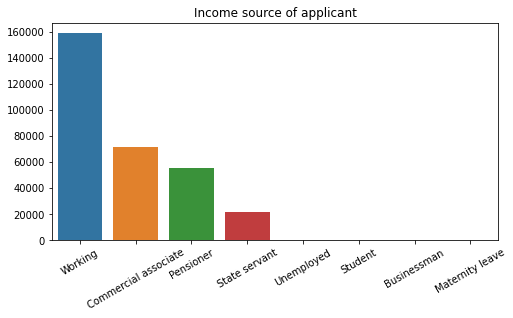

In [30]:
plot_categorical(df, col= 'NAME_INCOME_TYPE',xlabel_angle=30, title='Income source of applicant' )

In [31]:
pd.crosstab(df['TARGET'],df['NAME_INCOME_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
TARGET,,,,,,,,
0,0.003537,23.438373,0.001061,18.529393,7.235590,0.006367,0.004952,50.780725
1,0.000000,21.591138,0.008056,12.012085,5.031219,0.000000,0.032226,61.325277


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

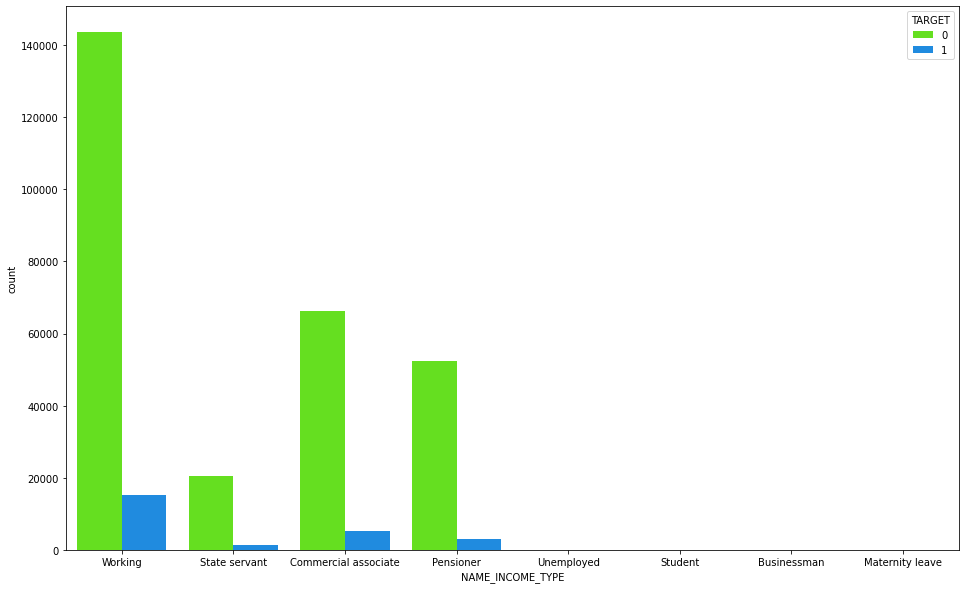

In [32]:
fig= plt.subplots(figsize=(16,10))
# ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=df,x='NAME_INCOME_TYPE',hue='TARGET',palette='gist_rainbow')

All Businessman and students repaying the loan

##### NAME_EDUCATION_TYPE
Level of highest education the client achieved


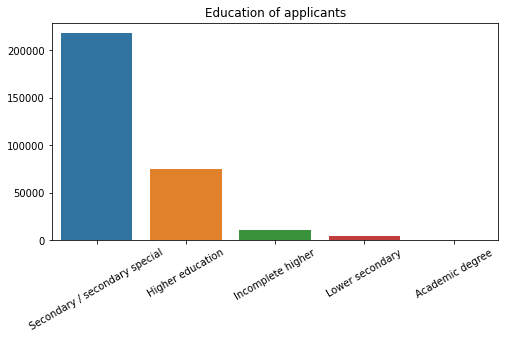

In [33]:
plot_categorical(df, col= 'NAME_EDUCATION_TYPE', xlabel_angle=30, title = 'Education of applicants')

In [34]:
pd.crosstab(df['TARGET'],df['NAME_EDUCATION_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
TARGET,,,,,
0,0.056954,25.064559,3.327013,1.202394,70.349080
1,0.012085,16.149043,3.512588,1.679758,78.646526


People with academic degree are more highly to repay the loan.

##### NAME_FAMILY_STATUS
Family status of the client


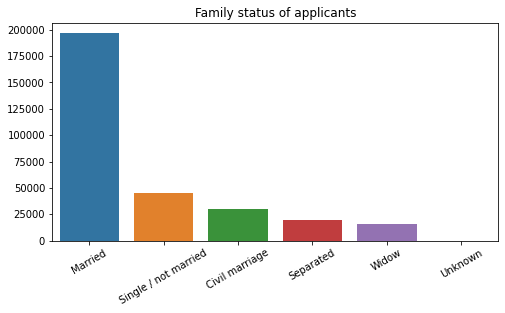

In [35]:
plot_categorical(df, col = 'NAME_FAMILY_STATUS', xlabel_angle=30, title='Family status of applicants')

In [36]:
pd.crosstab(df['TARGET'],df['NAME_FAMILY_STATUS']).apply(lambda r: r*100/r.sum(), axis=1)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
TARGET,,,,,,
0,9.485436,64.234522,6.420551,14.499126,0.000707,5.359657
1,11.927492,59.818731,6.525680,17.953676,0.000000,3.774421


In [37]:
pd.crosstab(df['NAME_FAMILY_STATUS'],df['TARGET']).apply(lambda r: round(r*100/r.sum()), axis=1)

TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,90.0,10.0
Married,92.0,8.0
Separated,92.0,8.0
Single / not married,90.0,10.0
Unknown,100.0,0.0
Widow,94.0,6.0


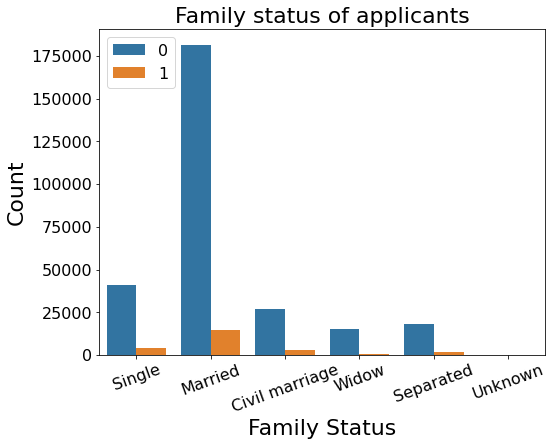

In [38]:
plt.figure(figsize = (8,6))

ax=sns.countplot(data=df,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.ylabel('Count', fontsize=22)
plt.xlabel('Family Status', fontsize=22 )
plt.title('Family status of applicants',fontsize=22)
ax.set_xticklabels(labels=['Single', 'Married', 'Civil marriage', 'Widow', 'Separated','Unknown'],rotation=20)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
# plt.legend(loc = 'best')
leg = ax.legend(prop={"size":16})


Widow and Married applicants are more likely to repay their loan

##### NAME_HOUSING_TYPE
What is the housing situation of the client (renting, living with parents, ...)


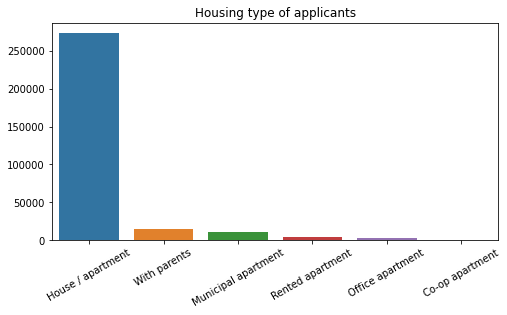

In [39]:
plot_categorical(df, col= 'NAME_HOUSING_TYPE', xlabel_angle=30, title='Housing type of applicants')

In [40]:
pd.crosstab(df['TARGET'],df['NAME_HOUSING_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)

NAME_HOUSING_TYPE,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
TARGET,,,,,,
0,0.365423,89.001931,3.618149,0.864917,1.514047,4.635532
1,0.358510,85.687815,3.846928,0.692850,2.420947,6.992951


###### DAYS_BIRTH
Client's age in days at the time of application


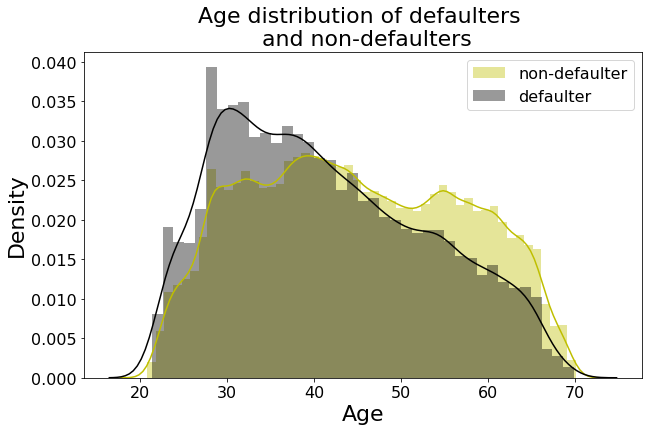

In [41]:
plt.figure(figsize=(10,6))

# plt.subplot(121)
ax=sns.distplot(df[df["TARGET"]==0]["DAYS_BIRTH"]/-360,color="y",label='non-defaulter')
# plt.title("Age distribution of non-defaulters", fontsize=20)
# plt.xlabel('Age', fontsize=22)

# plt.subplot(122)
ax=sns.distplot(df[df["TARGET"]==1]["DAYS_BIRTH"]/-360,color="k",label='defaulter')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.legend()
plt.xlabel('Age', fontsize=22)
plt.ylabel('Density', fontsize=22)
plt.title("Age distribution of defaulters \n and non-defaulters", fontsize=22)
leg = ax.legend(prop={"size":16})



Text(0.5, 0, 'Age')

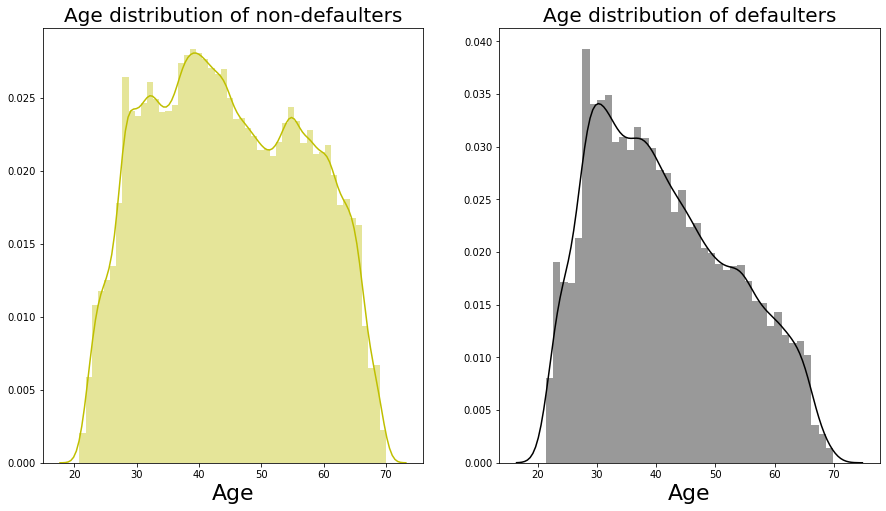

In [42]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.distplot(df[df["TARGET"]==0]["DAYS_BIRTH"]/-360,color="y")
plt.title("Age distribution of non-defaulters", fontsize=20)
plt.xlabel('Age', fontsize=22)

plt.subplot(122)
sns.distplot(df[df["TARGET"]==1]["DAYS_BIRTH"]/-360,color="k")
plt.title("Age distribution of defaulters", fontsize=20)
plt.xlabel('Age', fontsize=22)

In [43]:
# Find the correlation of the positive days since birth and target
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].corr(df['TARGET'])


-0.07823930830982712

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often

##### DAYS_REGISTRATION
How many days before the application did client change his registration



Text(0.5, 1.0, 'registration days distribution of who default')

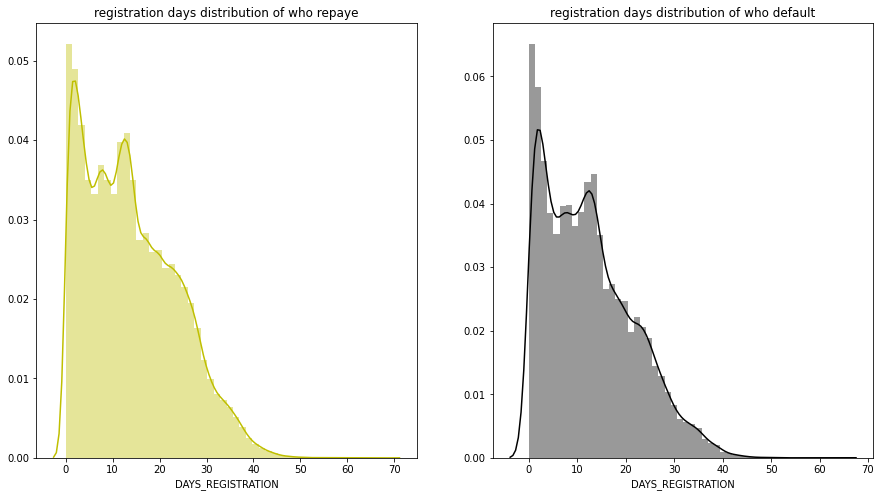

In [44]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.distplot(app_train[app_train["TARGET"]==0]["DAYS_REGISTRATION"]/-360,color="y")
plt.title("registration days distribution of who repaye")

plt.subplot(122)
sns.distplot(app_train[app_train["TARGET"]==1]["DAYS_REGISTRATION"]/-360,color="k")
plt.title("registration days distribution of who default")

##### DAYS_EMPLOYED
How many days before the application the person started current employment


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

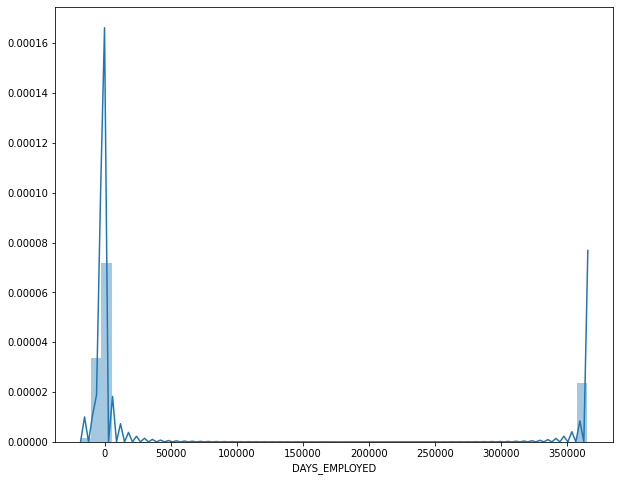

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(df['DAYS_EMPLOYED'])

The max value does not look right. 365243 days is about 1000 years!!!

In [46]:
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]



In [47]:
print(' The anomalies default on {} of the loans'.format (100* (anom['TARGET'].mean())))
print(' The non-anomalies default on {} of the loans'.format (100* (non_anom['TARGET'].mean())))
print(len(non_anom))

 The anomalies default on 5.399646043269405 of the loans
 The non-anomalies default on 8.65997453765215 of the loans
252137


In [48]:
len(df.columns)

97

In [49]:
# Create an anomalous flag column

df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243


In [50]:
# Replace the anomalous values with nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)



Text(0.5, 0, 'Days Employment')

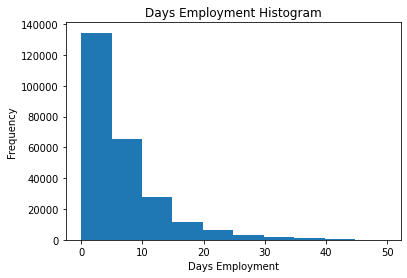

In [51]:
(df['DAYS_EMPLOYED']/-360).plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [52]:
df[df['DAYS_EMPLOYED']>(-365*2)]['TARGET'].value_counts()/sum(df['DAYS_EMPLOYED']>(-365*2))

0    0.887924
1    0.112076
Name: TARGET, dtype: float64

clients with more than 2 years of employments are more likely to repay their loan

##### AMT_INCOME_TOTAL
Income of the client


<AxesSubplot:xlabel='Total income'>

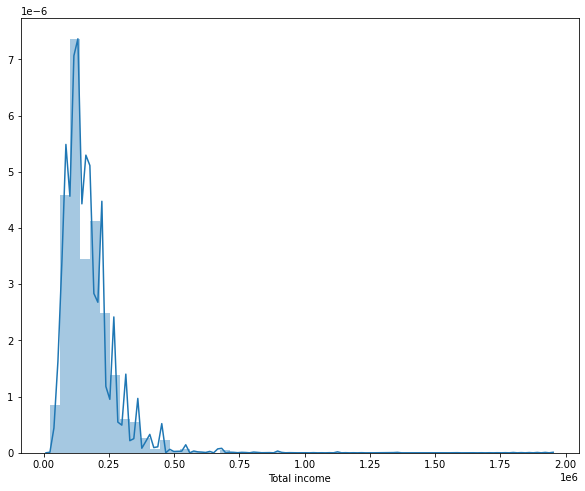

In [53]:
plt.figure(figsize=(10,8))
sns.distplot(df[df['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'], axlabel=("Total income"))

The data is skewed to left. We can apply log to fix the skewness.

In [54]:
(df[df['AMT_INCOME_TOTAL'] > 1000000]['TARGET'].value_counts())*100/len(df[df['AMT_INCOME_TOTAL'] > 1000000])

0    94.8
1     5.2
Name: TARGET, dtype: float64

 applicants with income more than 1000000$ are more likely to repay the loan. 

##### AMT_CREDIT
Credit amount of the loan


<AxesSubplot:xlabel='Credit amount of the loan'>

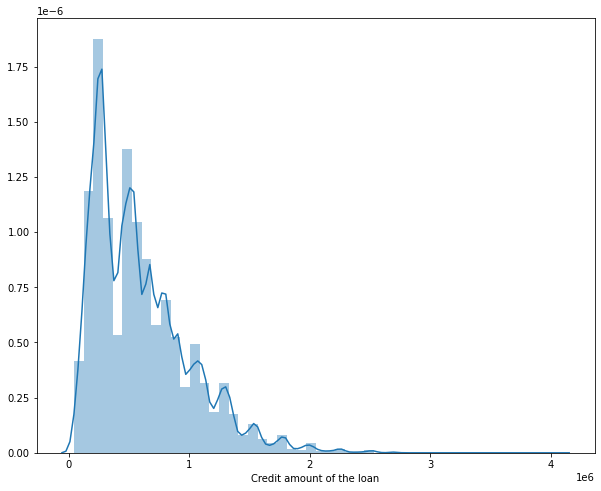

In [55]:
plt.figure(figsize=(10,8))
sns.distplot(df['AMT_CREDIT'], axlabel='Credit amount of the loan')

the data is skewed to left. we can fix it by transfering the data.

In [56]:
(df[df['AMT_CREDIT'] >100000]['TARGET'].value_counts())*100/len(df[df['AMT_CREDIT'] > 1000000])


0    554.192258
1     49.002701
Name: TARGET, dtype: float64

Customers with long amount of credir card are more likely to repay their loans.

Here we want to study the 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 and the first positive strongest correlation DAYS_BIRTH. According to the documentation, these features represent a "normalized score from external data source"

In [57]:
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

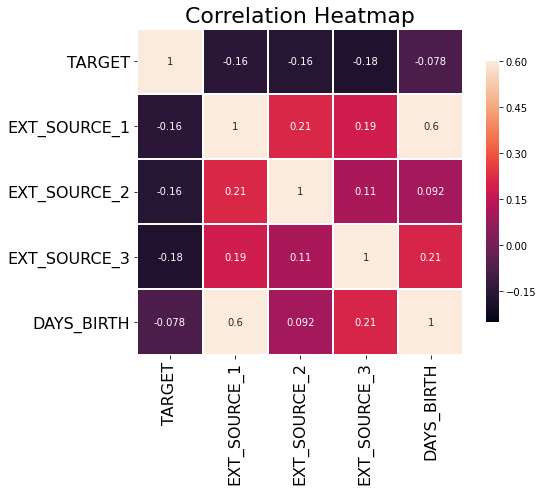

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, vmin = -0.25, annot = True, square=True, vmax = 0.6,
            linewidth=0.3, cbar_kws={"shrink": .8})

# yticks
# ax.yaxis.tick_left()
yticks_labels = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
plt.yticks(np.arange(5) + .5, labels=yticks_labels)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.set_ylim([5,0])    
plt.title('Correlation Heatmap', fontsize=22)

DAYS_BIRTH is positively correlated with EXT_SOURCE1, indicates maybe one the factor in this score is the client age

## Domain Knowledge Features

We can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan.

In [59]:
df.shape

(307511, 98)

In [60]:
# Flag to represent when Total income is greater than Credit
df['INCOME_GT_CREDIT_FLAG'] = df['AMT_INCOME_TOTAL'] > df['AMT_CREDIT']

# Column to represent Credit Income Percent
df['CREDIT_INCOME_PERCENT'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# Column to represent Annuity Income percent
df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# Column to represent Credit Term
df['CREDIT_TERM'] = df['AMT_CREDIT'] / df['AMT_ANNUITY'] 

# Column to represent Days Employed percent in his life
df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

# Shape of Application data
print('The shape of application data:',df.shape)

The shape of application data: (307511, 103)


### Visualizing new feature

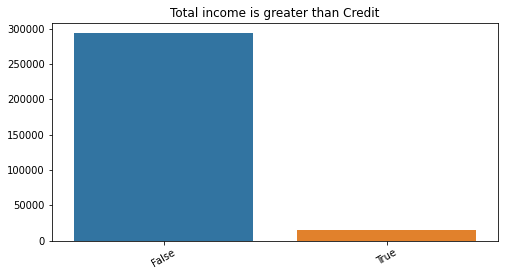

In [61]:
plot_categorical(df, col= 'INCOME_GT_CREDIT_FLAG', xlabel_angle=30, title='Total income is greater than Credit')

In [62]:
pd.crosstab(df['TARGET'],df['INCOME_GT_CREDIT_FLAG']).apply(lambda r: r*100/r.sum(), axis=1)

INCOME_GT_CREDIT_FLAG,False,True
TARGET,,
0,95.293364,4.706636
1,96.241692,3.758308


We do not know yet if these information are useful. The only way is to try them out!

# Data Preparation


In [63]:
y = df['TARGET']
x = df.drop(['TARGET'], axis =1 )


In [64]:
x = x.set_index(['SK_ID_CURR'])

In [65]:
x.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,INCOME_GT_CREDIT_FLAG,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,1.0,False,False,2.007889,0.121978,16.461104,-0.067329
100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,False,False,4.790750,0.132217,36.234085,-0.070862
100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,False,False,2.000000,0.100000,20.000000,-0.011814
100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,False,False,2.316167,0.219900,10.532818,-0.159905
100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,False,False,4.222222,0.179963,23.461618,-0.152418


In [66]:
#Features name

features_name = list(x.columns)
features_name

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVIN

In [67]:
len(x.columns)

101

In [68]:
# one-hot encoding of categorical variables

x = pd.get_dummies(x,drop_first=True)

In [69]:
x.shape

(307511, 209)

In [70]:
#Spliting the train and test data

x_train,x_test, y_train,y_test = train_test_split(x,y, random_state = 20, test_size=0.2)

we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). 

In [71]:
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(x_train)

# Transform both training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

# Repeat with the scaler
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print('Training data shape: ', x_train.shape)
print('Testing data shape: ', x_test.shape)

Training data shape:  (246008, 209)
Testing data shape:  (61503, 209)


## First Model: Logistic Regression

In [72]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
lr_y_pred = lr.predict(x_test)

In [74]:
lr_y_prob = lr.predict_proba(x_test)[:,1]

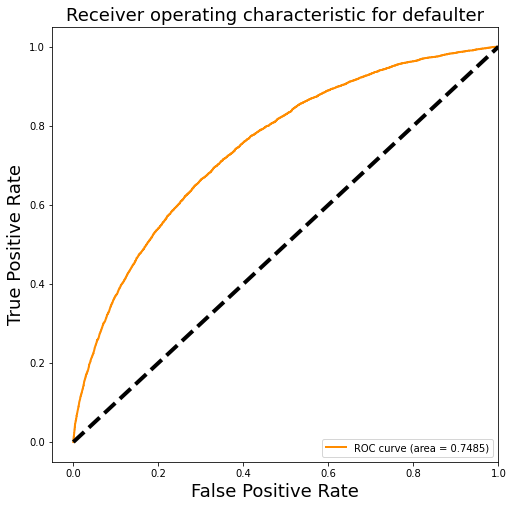

In [75]:
# For class 1, find the area under the curve

# Find fpr, tpr

fpr, tpr, _ = roc_curve(y_test, lr_y_prob)

# Find auc

roc_auc = auc(fpr, tpr)

#Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

#Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for defaulter', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [76]:
confusion_matrix(y_test, lr_y_pred)

array([[56480,    59],
       [ 4894,    70]], dtype=int64)

In [77]:
def summary_report(actual,prediction):
    
    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    
    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

In [78]:
summary_report(y_test, lr_y_pred)

Accuracy : 0.9195 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5426 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0141 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


## Second Model: Random Forest

In [79]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1)

In [80]:
random_forest.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [81]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': x, 'importance': feature_importance_values})

In [82]:
feature_importances

,feature,importance
0,"(C, N, T, _, C, H, I, L, D, R, E, N)",0.006694
1,"(A, M, T, _, I, N, C, O, M, E, _, T, O, T, A, L)",0.021280
2,"(A, M, T, _, C, R, E, D, I, T)",0.024696
3,"(A, M, T, _, A, N, N, U, I, T, Y)",0.026797
4,"(A, M, T, _, G, O, O, D, S, _, P, R, I, C, E)",0.021433
...,...,...
204,"(W, A, L, L, S, M, A, T, E, R, I, A, L, _, M, ...",0.000419
205,"(W, A, L, L, S, M, A, T, E, R, I, A, L, _, M, ...",0.001423
206,"(W, A, L, L, S, M, A, T, E, R, I, A, L, _, M, ...",0.001588
207,"(W, A, L, L, S, M, A, T, E, R, I, A, L, _, M, ...",0.000478


In [83]:
rf_y_pred = random_forest.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.4s finished


In [84]:
rf_y_prob = random_forest.predict_proba(x_test)[:, 1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.3s finished


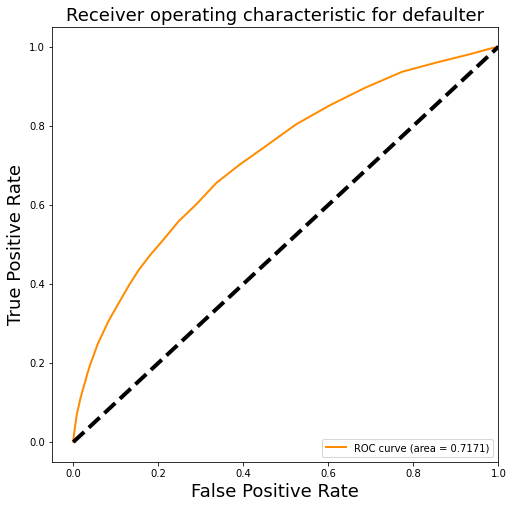

In [85]:
# For class 1, find the area under the curve

# Find fpr, tpr

fpr, tpr, _ = roc_curve(y_test, rf_y_prob)

# Find auc

roc_auc = auc(fpr, tpr)

#Plot of a ROC curve for class 1 (default)
plt.figure(figsize=[8,8])

#Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for defaulter', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [86]:
summary_report(y_test, rf_y_pred)

Accuracy : 0.9194 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7778 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0014 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


### Random Forest: different hyperparameter

In [87]:
rf = RandomForestClassifier(n_estimators = 1000, criterion='entropy',class_weight='balanced', max_depth=10 ,random_state = 50, verbose = 1)

In [88]:
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 21.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [89]:
rf_y_pred = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   19.0s finished


In [90]:
rf_y_prob = rf.predict_proba(x_test)[:, 1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   18.6s finished


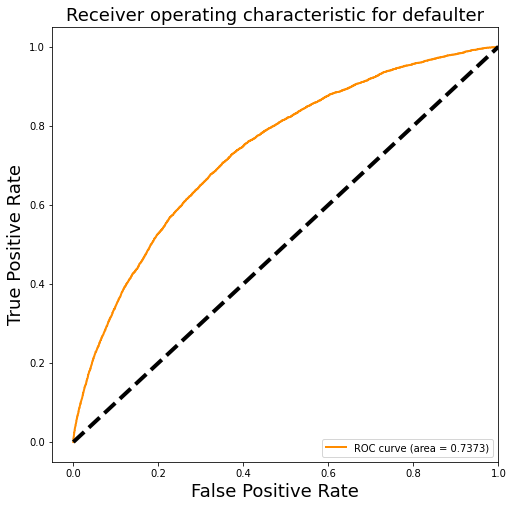

In [91]:
# For class 1, find the area under the curve

# Find fpr, tpr

fpr, tpr, _ = roc_curve(y_test, rf_y_prob)

# Find auc

roc_auc = auc(fpr, tpr)

#Plot of a ROC curve for class 1 (default)
plt.figure(figsize=[8,8])

#Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for defaulter', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [92]:
summary_report(y_test, rf_y_pred)

Accuracy : 0.7221 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1676 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6158 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


In [93]:
#importance feature
feature_importance_values = rf.feature_importances_

In [94]:
feature_importances = pd.DataFrame({'feature': list(x.columns), 'importance': feature_importance_values})


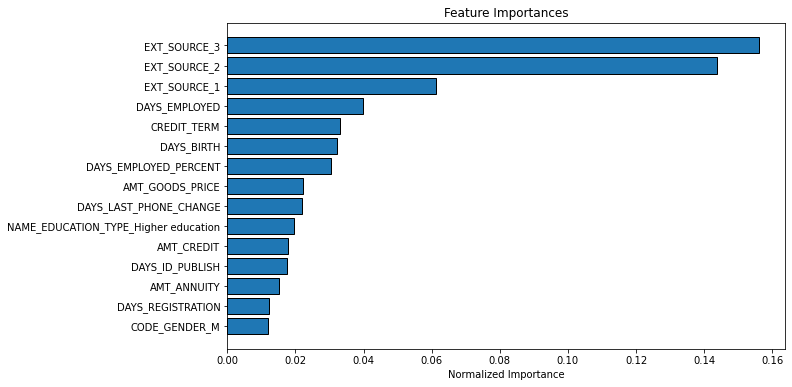

In [95]:
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index()
    
# Normalize the feature importances to add up to one
feature_importances['importance_normalized'] = feature_importances['importance'] / feature_importances['importance'].sum()

# Make a horizontal bar chart of feature importances
plt.figure(figsize = (10, 6))
ax = plt.subplot()
    
# Need to reverse the index to plot most important on top
ax.barh(list(reversed(list(feature_importances.index[:15]))), 
feature_importances['importance_normalized'].head(15), align = 'center', edgecolor = 'k')
    
# Set the yticks and labels
ax.set_yticks(list(reversed(list(feature_importances.index[:15]))))
ax.set_yticklabels(feature_importances['feature'].head(15))
    
# Plot labeling
plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
plt.show()

## Third Model: XGBoost

In [96]:
xgb = XGBClassifier(binary='logistic', random_state=50, )

In [97]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, binary='logistic', booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=50,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
xgb_y_pred = xgb.predict(x_test)

In [99]:
xgb_y_prob = xgb.predict_proba(x_test)[:, 1]


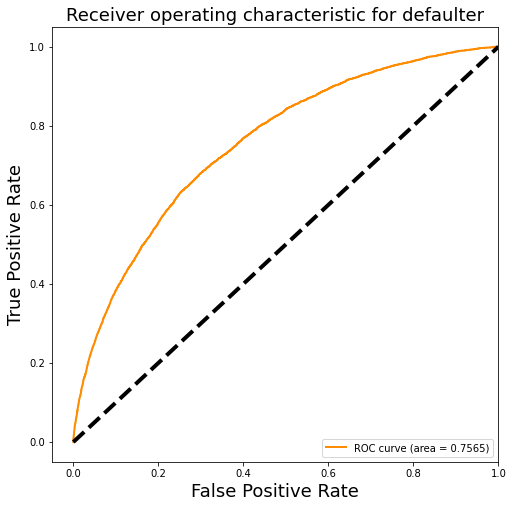

In [100]:
# For class 1, find the area under the curve

# Find fpr, tpr

fpr, tpr, _ = roc_curve(y_test, xgb_y_prob)

# Find auc

roc_auc = auc(fpr, tpr)

#Plot of a ROC curve for class 1 (default)
plt.figure(figsize=[8,8])

#Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for defaulter', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [101]:
summary_report(y_test, xgb_y_pred)

Accuracy : 0.9197 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0085 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


In [102]:
#importance feature
feature_importance_values = xgb.feature_importances_

In [103]:
feature_importances = pd.DataFrame({'feature': list(x.columns), 'importance': feature_importance_values})


C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


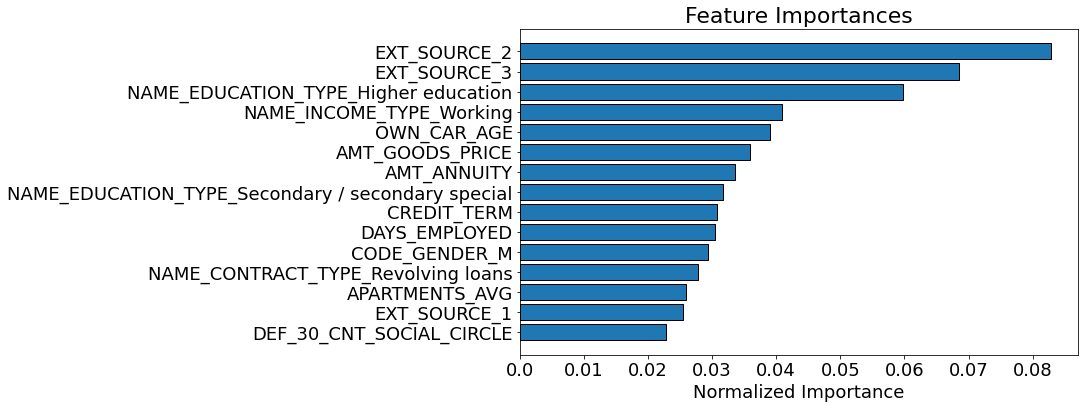

In [104]:
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index()
    
# Normalize the feature importances to add up to one
feature_importances['importance_normalized'] = feature_importances['importance'] / feature_importances['importance'].sum()

# Make a horizontal bar chart of feature importances
plt.figure(figsize = (10, 6))
ax = plt.subplot()
    
# Need to reverse the index to plot most important on top
ax.barh(list(reversed(list(feature_importances.index[:15]))), 
feature_importances['importance_normalized'].head(15), align = 'center', edgecolor = 'k')
    
# Set the yticks and labels
ax.set_yticks(list(reversed(list(feature_importances.index[:15]))))
ax.set_yticklabels(feature_importances['feature'].head(15), fontsize=18)
ax.set_xticklabels(labels=[0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08], fontsize=18)  

# Plot labeling
plt.xlabel('Normalized Importance', fontsize=18); plt.title('Feature Importances', fontsize=22)
plt.show()